In [1]:
import mne
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# read one sample data
mne_filename = "mne_data/C10_32Ch_48Subjects_al_raw_eeg.fif"
raw = mne.io.read_raw_fif(mne_filename, verbose=False)
events = mne.make_fixed_length_events(raw, start=0, stop=20, duration=2., overlap=1.5, id = 1)

Effective window size : 1.000 (s)


C:\Users\work\AppData\Local\Temp/ipykernel_11360/2209884043.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(method="welch").plot()
c:\Users\work\Anaconda3\envs\kia\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


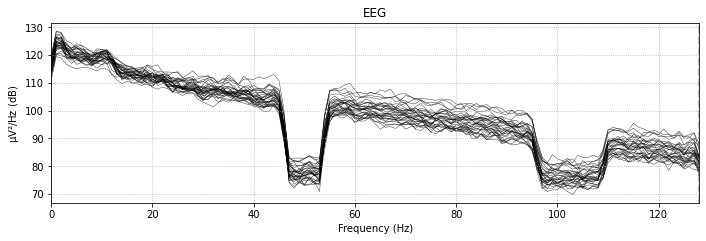

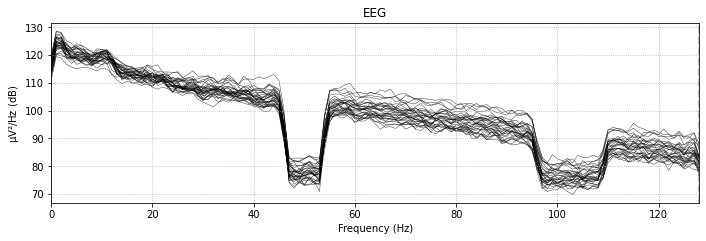

In [4]:
picks = ["FP1", "AF3", "F7", "F3", "FP2", "AF4", "F8", "F4"]
raw.compute_psd(method="welch").plot()

In [7]:
# make epochs
event_id = dict(epoch=1)  # event trigger and conditions
tmin = 0  # start of each epoch
tmax = 2  # end of each epoch
baseline = (0, 0)  # means from the first instant to t = 0
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks="all", baseline=baseline, verbose=False)

In [4]:
evoked = epochs.average()

In [5]:
epo_spectrum = evoked.compute_psd(method="welch")
psds, freqs = epo_spectrum.get_data(return_freqs=True)

Effective window size : 1.000 (s)


In [16]:
fmin = (0., 4., 8., 13., 30.)
fmax = (4., 8., 13., 30., 45.)
freqs = ["delta", "theta", "alpha", "beta", "gamma"]

In [25]:
psds[:, 4:8].mean(axis=1)

array([0.0109173 , 0.0127085 , 0.01569351, 0.01944721, 0.03386117,
       0.00346549, 0.01177934, 0.00791516, 0.00550541, 0.00826978,
       0.02057691, 0.02434618, 0.00400109, 0.06045927, 0.02189855,
       0.05764478, 0.01243475, 0.03420854, 0.02491956, 0.01569328,
       0.00966183, 0.00526133, 0.01602709, 0.01924308, 0.00912095,
       0.0113318 , 0.00494964, 0.02002104, 0.00783928, 0.01423841,
       0.02412435, 0.0175747 ])

# Full pipeline

In [3]:
mne_data = pd.read_csv("mne_data.csv")
mne_data

,pid,al,fa
0,1,mne_data/C1_32Ch_48Subjects_al_raw_eeg.fif,mne_data/C1_32Ch_48Subjects_fa_raw_eeg.fif
1,2,mne_data/C2_32Ch_48Subjects_al_raw_eeg.fif,mne_data/C2_32Ch_48Subjects_fa_raw_eeg.fif
2,3,mne_data/C3_32Ch_48Subjects_al_raw_eeg.fif,mne_data/C3_32Ch_48Subjects_fa_raw_eeg.fif
3,4,mne_data/C4_32Ch_48Subjects_al_raw_eeg.fif,mne_data/C4_32Ch_48Subjects_fa_raw_eeg.fif
4,5,mne_data/C5_32Ch_48Subjects_al_raw_eeg.fif,mne_data/C5_32Ch_48Subjects_fa_raw_eeg.fif
5,6,mne_data/C6_32Ch_48Subjects_al_raw_eeg.fif,mne_data/C6_32Ch_48Subjects_fa_raw_eeg.fif
6,7,mne_data/C7_32Ch_48Subjects_al_raw_eeg.fif,mne_data/C7_32Ch_48Subjects_fa_raw_eeg.fif
7,8,mne_data/C8_32Ch_48Subjects_al_raw_eeg.fif,mne_data/C8_32Ch_48Subjects_fa_raw_eeg.fif
8,9,mne_data/C9_32Ch_48Subjects_al_raw_eeg.fif,mne_data/C9_32Ch_48Subjects_fa_raw_eeg.fif
9,10,mne_data/C10_32Ch_48Subjects_al_raw_eeg.fif,mne_data/C10_32Ch_48Subjects_fa_raw_eeg.fif


In [4]:
mne_files = mne_data[["al", "fa"]].values.reshape(-1)

In [50]:
X = []
Y = []

for mne_filename in mne_files:
    print(f"Running: {mne_filename}")
    # read file and make events
    p_id = mne_filename[10:12].replace("_","")
    if "_al_" in mne_filename: 
        condition = "al"
    elif "_fa_" in mne_filename:
        condition = "fa"
    raw = mne.io.read_raw_fif(mne_filename, verbose=False)
    events = mne.make_fixed_length_events(raw, start=0, stop=20, duration=2., overlap=1.5, id = 1)
    # make epochs
    event_id = dict(epoch=1)  # event trigger and conditions
    tmin = 0  # start of each epoch
    tmax = 2  # end of each epoch
    baseline = (0, 0)  # means from the first instant to t = 0
    reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                        picks="all", baseline=baseline, verbose=False)
    # compute psd
    picks = ["FP1", "AF3", "F7", "F3", "FP2", "AF4", "F8", "F4", "FC1", "FC2", "FZ"]
    evoked = epochs.average()
    epo_spectrum = evoked.compute_psd(method="welch",fmin = 0, fmax=40, picks = picks)
    psds, freqs = epo_spectrum.get_data(return_freqs=True)

    # raw_spectrum = raw.compute_psd(method="welch", fmin = 0, fmax=40)
    # psds, freqs = raw_spectrum.get_data(return_freqs=True)

    fmin = (0., 4., 8., 13., 30.)
    fmax = (4., 8., 13., 30., 45.)
    freqs = ["delta", "theta", "alpha", "beta", "gamma"]

    # get the mean of the psd for each frequency band
    pds_band = []
    for i, (fmin, fmax) in enumerate(zip(fmin, fmax)):
        pds_band.append(psds[:, int(fmin):int(fmax)].mean(axis=1))
    
    # append to X and Y
    X.append(pds_band)
    Y.append(condition)

X = np.array(X)
Y = np.array([0 if y == "al" else 1 for y in Y])

Running: mne_data/C1_32Ch_48Subjects_al_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C1_32Ch_48Subjects_fa_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C2_32Ch_48Subjects_al_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C2_32Ch_48Subjects_fa_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C3_32Ch_48Subjects_al_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C3_32Ch_48Subjects_fa_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C4_32Ch_48Subjects_al_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C4_32Ch_48Subjects_fa_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C5_32Ch_48Subjects_al_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C5_32Ch_48Subjects_fa_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C6_32Ch_48Subjects_al_raw_eeg.fif
Effective window size : 1.000 (s)
Running: mne_data/C6_32Ch_48Subjects_fa_raw_eeg.fif
Ef

# classification

In [51]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, permutation_test_score
from sklearn.feature_selection import SelectFromModel, RFE

from sklearn.metrics import accuracy_score, classification_report
from airtable.airtable import AirTableClient
from airtable.config import config
from pyairtable import Table

In [52]:
# logging to airtable
atc = AirTableClient(**config["psd"])

In [53]:
models = {
    "svm": {
        "model": SVC(kernel='linear', C=1),
        "params": {
            "C": [0.1, 1, 10, 100, 1000],
            "kernel": ['linear', 'rbf']
        }
    }
}

In [54]:
def run_grid_search(model_name, model, params, X, y):
    """
    run grid search for a model
    """
    grid_search = GridSearchCV(model, params, cv=2, return_train_score=False)
    grid_search.fit(X, y)
    # print("Best params: ", grid_search.best_params_)
    # print("Best score: ", grid_search.best_score_)
    return grid_search.best_params_, grid_search.best_score_

def get_metrics(y_true, y_pred):
    """
    get the metrics for the model
    """
    full_classification_report = classification_report(y_true, y_pred, output_dict=True)
    specificity = round(full_classification_report["0"]["recall"], 3)
    sensitivity = round(full_classification_report["1"]["recall"], 3)
    accuracy = round(full_classification_report["accuracy"], 3)
    
    return specificity, sensitivity, accuracy

In [55]:
for i, freq in enumerate(freqs):
    X_freq = X[:, i, :]

    is_feature_selection = True
    if is_feature_selection:
        # lsvc = Ridge()
        lsvc = LinearRegression()
        # rfe = SelectFromModel(lsvc, prefit=False, threshold=-np.inf, max_features=int(X.shape[1]*0.3))
        rfe = SelectFromModel(lsvc)
        # rfe = RFE(lsvc, n_features_to_select = int(X.shape[1]*0.1), step=1)
        rfe.fit(X_freq, Y)
        X_new = rfe.transform(X_freq)
    else:
        X_new = X_freq

    for m in models.keys():
        print(f"Processing: model: {m}, freq: {freq}")
        best_params, best_score = run_grid_search(m, models[m]["model"], models[m]["params"], X_new, Y)
        # run best model
        print(best_score)

        # list_acc = []
        # for i in range(100):
        #     X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.5, random_state=i)
        #     model = models[m]["model"].set_params(**best_params)
        #     model.fit(X_train, Y_train)
        #     score = model.score(X_test, Y_test)
        #     # Y_pred = model.predict(X_test)
        # # score = round(accuracy_score(Y_test, Y_pred),3)

        #     # specificity, sensitivity, accuracy = get_metrics(Y_test, Y_pred)
        #     list_acc.append(score)

        model = models[m]["model"].set_params(**best_params)
        score, permutation_scores, pvalue = permutation_test_score(model, X_new, Y, cv=2, n_permutations=1000, n_jobs=1)
        print(f"score: {score}, pvalue: {pvalue}")

        # print classification report
        # print(classification_report(Y_test, Y_pred))

        # full_classification_report = classification_report(Y_test, Y_pred)

        # res = {
        #     "frequency": freq,
        #     "model": m,
        #     "best_params": str(best_params),
        #     "accuracy": str(accuracy),
        #     "specificity": str(specificity),
        #     "sensitivity": str(sensitivity),
        #     "full accuracy report": full_classification_report
        # }
        # atc.add_row(res)


Processing: model: svm, freq: delta
0.59375
score: 0.59375, pvalue: 0.05094905094905095
Processing: model: svm, freq: theta
0.625
score: 0.625, pvalue: 0.02097902097902098
Processing: model: svm, freq: alpha
0.6770833333333333
score: 0.6770833333333333, pvalue: 0.000999000999000999
Processing: model: svm, freq: beta
0.5520833333333333
score: 0.5520833333333333, pvalue: 0.19880119880119881
Processing: model: svm, freq: gamma
0.5625
score: 0.5625, pvalue: 0.16883116883116883
